In [28]:
#CLASSIFICATION
!pip install catboost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier # Now you can import CatBoostClassifier

In [29]:
# Convert the all categories columns into numerical columns using the label encoding
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

for col in data.select_dtypes(include='object'):
    labelencoder=LabelEncoder()
    labelencoder.fit(data[col].unique())
    data[col]=labelencoder.transform(data[col])

In [30]:
data = data[data["GraduationYear"]> 2000]

In [31]:
data = data[data["collegeGPA"] > 40]

In [32]:
data.drop(columns=['10board', '12board', 'Degree', 'Specialization', "CollegeCityTier", 'CollegeState'], inplace=True)

In [33]:
data["Salary"] = pd.cut(data["Salary"], bins=15, labels=False)

In [34]:
data.head()

,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,GraduationYear,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,1,87.80,2009,84.00,6920,1,73.82,2013,650,665,...,0,0,0,0,-0.1590,0.3789,1.2396,0.14590,0.2889,1
1,0,57.00,2010,64.50,6624,2,65.00,2014,440,435,...,0,0,0,0,1.1336,0.0459,1.2396,0.52620,-0.2859,0
2,0,77.33,2007,85.17,9084,2,61.94,2011,485,475,...,0,0,260,0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,0
3,0,84.30,2009,86.00,8195,1,80.40,2013,675,620,...,0,0,0,0,-0.4463,0.2124,0.3174,0.27270,0.4805,1
4,1,82.00,2008,75.00,4889,2,64.30,2012,575,495,...,0,0,0,0,-1.4992,-0.7473,-1.0697,0.06223,0.1864,0


In [35]:
print(data)

      Gender  10percentage  12graduation  12percentage  CollegeID  \
0          1         87.80          2009         84.00       6920   
1          0         57.00          2010         64.50       6624   
2          0         77.33          2007         85.17       9084   
3          0         84.30          2009         86.00       8195   
4          1         82.00          2008         75.00       4889   
...      ...           ...           ...           ...        ...   
2993       1         75.00          2005         73.00       1263   
2994       1         84.00          2008         77.00       9481   
2995       0         91.40          2006         65.56        547   
2996       0         88.64          2006         65.16       1629   
2997       0         77.00          2009         75.50       1111   

      CollegeTier  collegeGPA  GraduationYear  English  Logical  ...  \
0               1       73.82            2013      650      665  ...   
1               2       65.

In [36]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split the data into independent and dependent variable
X=data.drop(['Salary'],axis=1)
y=data['Salary']
# Normalization the data using the Standard Scaler
standard=StandardScaler()
X=standard.fit_transform(X)
# Split the data into train and test data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
# Create a function for machine learning modeling
def machine_learning_model(model,X_train,X_test,y_train,y_test):
    '''
    In the function we write about the code for machine learning model
    Firstly we fit the train data to the model
    and predict the values with test data and store the values with variable
    and then print the accuracy score along with classification and confusion matrix

    '''
    print(f'The {model} ')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_score=accuracy_score(y_test,y_pred)
    print(f'\nThe accuracy score of the {model} is {model_score*100 :.2f}')
    print(f'\n {classification_report(y_test,y_pred)}')
    print(f'\n{confusion_matrix(y_test,y_pred)}')
    matrix=confusion_matrix(y_test,y_pred)
    sns.heatmap(matrix,annot=True,cmap='Reds',fmt='.2f',linewidths=1)
    plt.show()
    print('-'*100)



In [45]:
from sklearn.linear_model import LogisticRegression
models={
    'logistic':LogisticRegression(penalty='l2'),
    'decison':DecisionTreeClassifier(criterion='gini',splitter='best',),
    'Random':RandomForestClassifier(n_estimators=50,criterion='gini'),
    'Knn':KNeighborsClassifier(),
    'catboost':CatBoostClassifier(iterations=1)
}

The LogisticRegression() 

The accuracy score of the LogisticRegression() is 76.24

               precision    recall  f1-score   support

           0       0.81      0.93      0.86       412
           1       0.53      0.35      0.42       133
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.76       564
   macro avg       0.17      0.16      0.16       564
weighted avg       0.72      0.76      0.73       564


[[384  28   0   0   0   0   0   0]
 [ 86  46   1   0   0   0   0   0]
 [  2   8   0   0   1   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  2   2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  0   1   0   0 

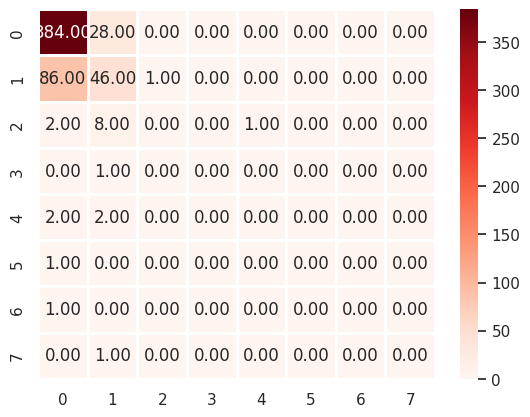

----------------------------------------------------------------------------------------------------
The DecisionTreeClassifier() 

The accuracy score of the DecisionTreeClassifier() is 68.62

               precision    recall  f1-score   support

           0       0.81      0.81      0.81       412
           1       0.40      0.41      0.40       133
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0

    accuracy                           0.69       564
   macro avg       0.13      0.14      0.13       564
weighted avg       0.68      0.69      0.68       564


[[332  73   2   2   1   1   0   0   1]
 [ 72  55   6   0   0   0   0   0   0]
 [  2   9   0   0   0 

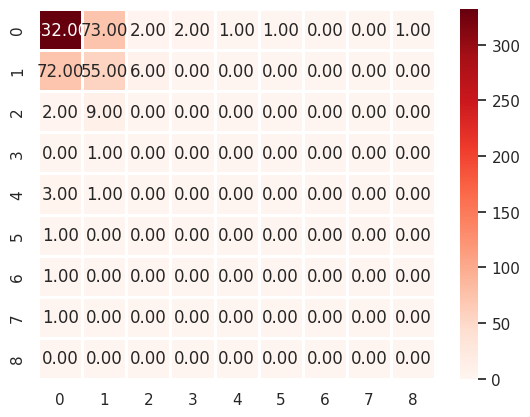

----------------------------------------------------------------------------------------------------
The RandomForestClassifier(n_estimators=50) 

The accuracy score of the RandomForestClassifier(n_estimators=50) is 76.24

               precision    recall  f1-score   support

           0       0.79      0.95      0.86       412
           1       0.57      0.30      0.39       133
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.76       564
   macro avg       0.17      0.16      0.16       564
weighted avg       0.71      0.76      0.72       564


[[390  22   0   0   0   0   0   0]
 [ 93  40   0   0   0   0   0   0]
 [  4   7   0   0   0   0   0   0]
 [  1   0   0   0  

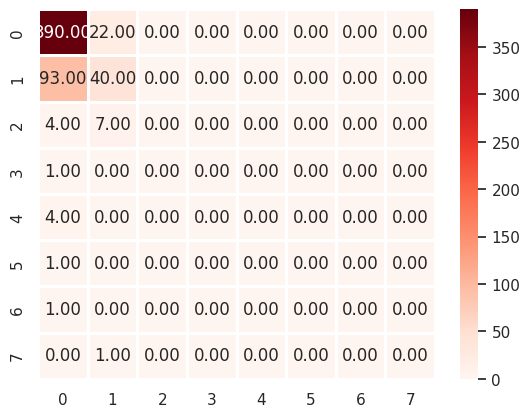

----------------------------------------------------------------------------------------------------
The KNeighborsClassifier() 

The accuracy score of the KNeighborsClassifier() is 73.23

               precision    recall  f1-score   support

           0       0.78      0.90      0.84       412
           1       0.46      0.30      0.36       133
           2       1.00      0.09      0.17        11
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.73       564
   macro avg       0.28      0.16      0.17       564
weighted avg       0.70      0.73      0.70       564


[[372  40   0   0   0   0   0   0]
 [ 93  40   0   0   0   0   0   0]
 [  6   4   1   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  3   1   0   0 

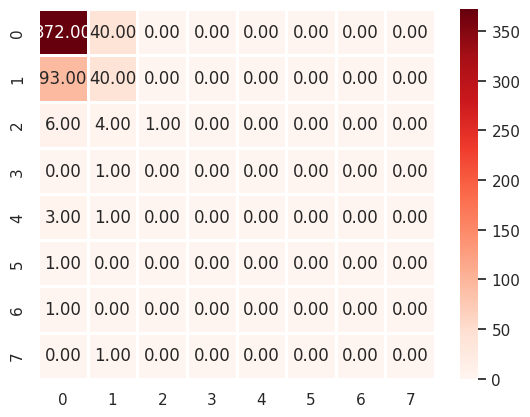

----------------------------------------------------------------------------------------------------
The <catboost.core.CatBoostClassifier object at 0x78b772a87760> 
Learning rate set to 0.5
0:	learn: 0.9934169	total: 29.5ms	remaining: 0us

The accuracy score of the <catboost.core.CatBoostClassifier object at 0x78b772a87760> is 75.00

               precision    recall  f1-score   support

           0       0.76      0.97      0.85       412
           1       0.59      0.17      0.27       133
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.75       564
   macro avg       0.17      0.14      0.14       564
weighted avg       0.70      0.75      0.69       564


[[400  12 

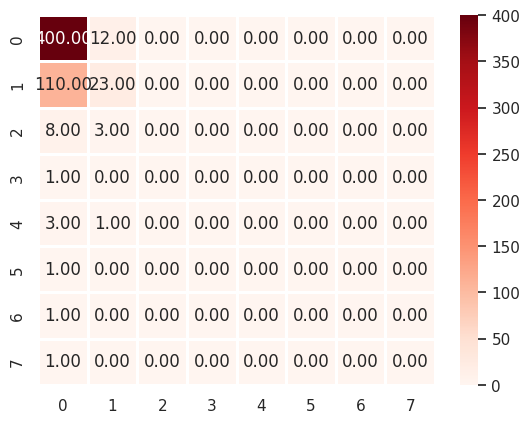

----------------------------------------------------------------------------------------------------


In [46]:
for i in range(len(models)):
    model_names=list(models.values())[i]
    names=list(models.keys())[i]
# And apply the machine learning function to the models
    machine_learning_model(model_names,X_train,X_test,y_train,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
The Deep Neural Network:

The accuracy score is 23.58

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       412
           1       0.24      1.00      0.38       133
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.24       564
   macro avg       0.03      0.12      0.05       564
weighted avg       0.06      0.24      0.09       564


Confusion Matrix:
[[  0 412   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  0   1   0   0   0   0 

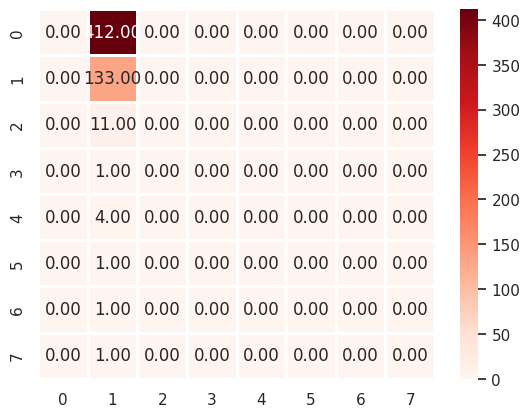

------------------------------


In [48]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def deep_neural_network_model(X_train, X_test, y_train, y_test):
    """
    Fits a deep neural network model to the training data, predicts values for the test data,
    and evaluates the model's performance.

    Args:
        X_train (numpy.ndarray): Training features.
        X_test (numpy.ndarray): Test features.
        y_train (numpy.ndarray): Training labels.
        y_test (numpy.ndarray): Test labels.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    y_pred = (model.predict(X_test) > 0.3).astype(int)  # Convert probabilities to binary predictions
    model_score = accuracy_score(y_test, y_pred)

    print(f'The Deep Neural Network:')
    print(f'\nThe accuracy score is {model_score * 100:.2f}')
    print(f'\n{classification_report(y_test, y_pred)}')
    print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='.2f', linewidths=1)
    plt.show()
    print('-' * 30)

#Example usage:
deep_neural_network_model(X_train, X_test, y_train, y_test)
